# Assignment 5: Deep Learning {-}

This assignment aims at familiarizing you with training and testing a Deep Neural Network (DNN). The dataset you will be working on is CIFAR-10. You will have to do:

1.  **(5 points) Coding tasks:** The following questions involve writing code to complete specific tasks.  
    1.1 *(1 point)* Load the CIFAR-10 dataset, visualize sample images, and perform data normalization to improve training performance.  
    1.2 *(1 point)* First network: Build, train, and test a deep neural network with at least three convolutional layers, two fully connected layers, and two pooling layers.  
    1.3 *(1 point)* Second network: Build, train, and test another deep neural network, with an architecture of your choice, but at most 4M (four million) parameters, ensuring the architecture meets this constraint by verifying with model.summary().  
    1.4 *(2 points)* Modify the second network architecture by tuning the layer hyperparameters or adjusting the layer design to improve test accuracy while remaining within the four million parameter limit. Discuss your observations and the trade offs of the changes you make.  

2.  **(5 points) Open discussion questions:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    2.1 *(1 point)* How did hyperparameter tuning (learning rate, dropout, batch size) affect your model’s accuracy? Were there any unexpected results?  
    2.2 *(1 point)* How did the constraint of keeping the model within 4 million parameters impact your design choices? Would a larger model necessarily perform better?  
    2.3 *(1 point)* How can deep learning models trained on datasets like CIFAR-10 be applied in real-world scenarios? Give an example.  
    2.4 *(1 point)* Deep learning models for image recognition can have biases. What ethical concerns should be considered when deploying such models?  
    2.5 *(1 point)* What was the most interesting or challenging part of this assignment? If you had more time, what additional improvements would you make?  

The dataset you will be working on is CIFAR-10 (https://www.cs.toronto.edu/~kriz/cifar.html) which consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. Here follows the ten object classes:
* airplane
*	automobile
*	bird
*	cat
*	deer
*	dog
*	frog
*	horse
*	ship
*	truck

Here follows some data samples in the dataset:

![alt text](https://docs.pytorch.org/tutorials/_images/cifar10.png)

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment5-notebook.ipynb: Jupyter notebook containing source code.
- ./\<Test-accuracy>-\<StudentID>.txt: accuracy of the second network on the test set (for extra credit, see the 'Evaluation' part below). For example if you get 0.8124 accuracy, the name of this file is 08124-2012345.txt. The file content is left empty.

The submission folder is named ML4DS-\<StudentID>-Assignment5 (e.g., ML4DS-2012345-Assigment5) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have modeling steps other than the basic requirements and achieve an excellent model accuracy. In addition, your code should conform to a Python coding convention such as PEP-8.

EXTRA CREDIT: Top-3 submissions achieving the highest test accuracy on the second network (of 4M params at most) will be rewarded an extra credit. **You have to ensure the architecture meets this constraint by verifying and printing out the number of parameters with model.summary(). Please follow the submission format to be eligible for this extra credit.**

### Deadline {-}
Please visit Canvas for details.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras              # Keras is the high-level API of TensorFlow
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

2025-12-09 02:54:05.053500: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-09 02:54:05.126493: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2025-12-09 02:54:06.739916: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:

tf.config.set_visible_devices([], 'GPU')


W0000 00:00:1765223649.373420  552180 gpu_device.cc:2431] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
W0000 00:00:1765223649.378919  552180 gpu_device.cc:2431] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.


In [3]:
# PLEASE DO NOT CHANGE THIS CODE

# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

y_train = y_train.reshape(-1,)
y_val = y_val.reshape(-1,)
y_test = y_test.reshape(-1,)


print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Validation shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (45000, 32, 32, 3), y_train = (45000,)
Validation shape: X_val = (5000, 32, 32, 3), y_val = (5000,)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000,)


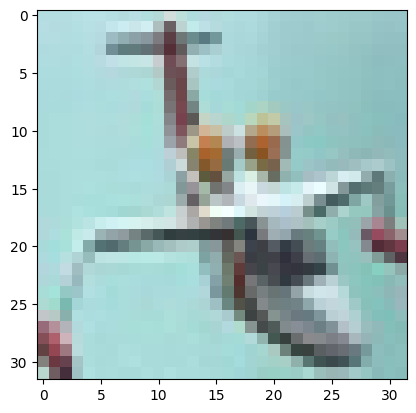

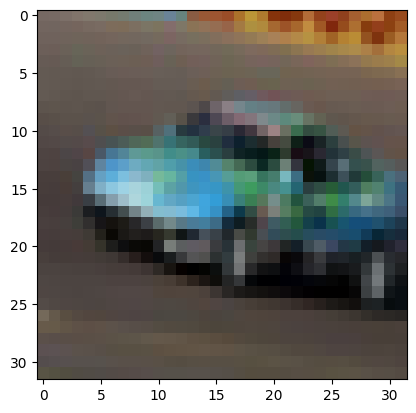

In [4]:
# Show some samples in the dataset
import matplotlib.pyplot as plt
imgplot = plt.imshow(X_train[44999])
plt.show()
imgplot = plt.imshow(X_test[4999])
plt.show()

## 1. Coding tasks

1. Load the CIFAR-10 dataset, visualize sample images, and perform data normalization to improve training performance.

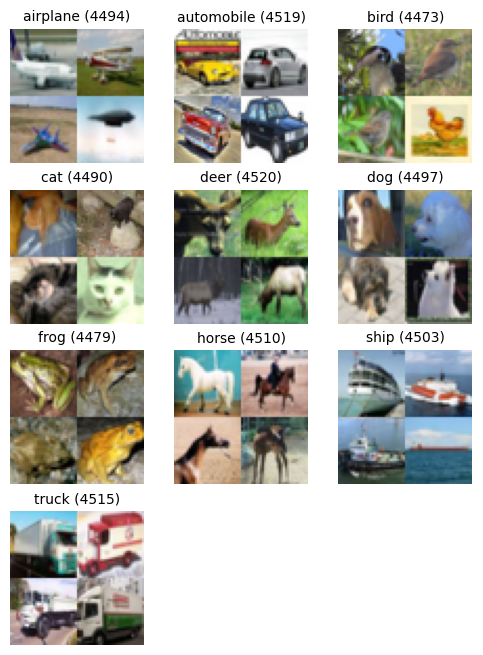

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 class names
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Count how many samples belong to each class
class_counts = np.bincount(y_train.flatten(), minlength=10)

# For each class, collect indices of all images
class_indices = {i: np.where(y_train.flatten() == i)[0] for i in range(10)}

# Plot setup
fig, axes = plt.subplots(4, 3, figsize=(6, 8))
axes = axes.flatten()

for i in range(10):
    ax = axes[i]

    # Randomly pick 4 images from this class
    idxs = np.random.choice(class_indices[i], 4, replace=False)
    imgs = X_train[idxs]

    # Create a small 2x2 grid inside the subplot
    combined = np.zeros((64, 64, 3), dtype=np.uint8)  # 32*2 = 64 pixels per side
    combined[:32, :32] = imgs[0]
    combined[:32, 32:] = imgs[1]
    combined[32:, :32] = imgs[2]
    combined[32:, 32:] = imgs[3]

    ax.imshow(combined)
    ax.set_title(f"{class_names[i]} ({class_counts[i]})", fontsize=10)
    ax.axis("off")

# Turn off remaining unused subplots
for ax in axes[10:]:
    ax.axis("off")

plt.show()


In [6]:
# Convert pixel values from 0–255 to 0–1 (normalizing)
X_train_norm = X_train.astype("float32") / 255.0
X_val_norm = X_val.astype("float32") / 255.0
X_test_norm = X_test.astype("float32") / 255.0

print("Data normalized: pixel values are now between 0 and 1.")
print("Random normalized pixel: ", X_train_norm[44998][16][16])

Data normalized: pixel values are now between 0 and 1.
Random normalized pixel:  [0.09803922 0.07058824 0.0627451 ]


In [7]:
#training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Training on:", device)

# Convert to tensors
X_train_t = torch.tensor(X_train_norm, dtype=torch.float32).permute(0, 3, 1, 2)
X_val_t   = torch.tensor(X_val_norm, dtype=torch.float32).permute(0, 3, 1, 2)
X_test_t  = torch.tensor(X_test_norm, dtype=torch.float32).permute(0, 3, 1, 2)

y_train_t = torch.tensor(y_train.reshape(-1), dtype=torch.long)
y_val_t   = torch.tensor(y_val.reshape(-1), dtype=torch.long)
y_test_t  = torch.tensor(y_test.reshape(-1), dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=128, shuffle=True)
val_loader   = DataLoader(TensorDataset(X_val_t, y_val_t), batch_size=128)
test_loader  = DataLoader(TensorDataset(X_test_t, y_test_t), batch_size=128)

Training on: cuda


2. First network: Build, train, and test a deep neural network with at least three convolutional layers, two fully connected layers, and two pooling layers

In [8]:
# -------------------------
# Model
# -------------------------
class MyCNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout2d(0.2),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
            nn.Dropout2d(0.2)
        )

        self.block2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Dropout2d(0.2),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Dropout2d(0.2),
            nn.MaxPool2d(2)
        )

        self.block3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Dropout2d(0.2),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Dropout2d(0.2)
        )

        self.gap = nn.AdaptiveAvgPool2d((1, 1))

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Dropout(0.35),
            nn.Linear(512, 10)
        )
        
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.gap(x)
        x = self.fc(x)
        return x

model = MyCNN().to(device)
print(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# -------------------------
# Train + Evaluate
# -------------------------
train_losses = []
val_accuracies = []

def train_one_epoch():
    model.train()
    total_loss = 0

    for X, y in train_loader:
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(train_loader)

def evaluate(loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for X, y in loader:
            X, y = X.to(device), y.to(device)
            pred = model(X).argmax(1)
            correct += (pred == y).sum().item()
            total += y.size(0)

    return correct / total


# -------------------------
# Run training
# -------------------------
for epoch in range(1, 31):
    train_loss = train_one_epoch()
    val_acc = evaluate(val_loader)

    train_losses.append(train_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch:2d} | Loss: {train_loss:.4f} | Val Acc: {val_acc:.4f}")

# -------------------------
# Test accuracy
# -------------------------
test_acc = evaluate(test_loader)
print("Test accuracy:", test_acc)


MyCNN(
  (block1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout2d(p=0.2, inplace=False)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Dropout2d(p=0.2, inplace=False)
  )
  (block2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout2d(p=0.2, inplace=False)
    (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): D

Epoch  1 | Loss: 1.5171 | Val Acc: 0.5654


Epoch  2 | Loss: 1.1181 | Val Acc: 0.6608


Epoch  3 | Loss: 0.9720 | Val Acc: 0.7108


Epoch  4 | Loss: 0.8648 | Val Acc: 0.7390


Epoch  5 | Loss: 0.7736 | Val Acc: 0.7726


Epoch  6 | Loss: 0.7030 | Val Acc: 0.7918


Epoch  7 | Loss: 0.6348 | Val Acc: 0.8046


Epoch  8 | Loss: 0.5895 | Val Acc: 0.8122


Epoch  9 | Loss: 0.5501 | Val Acc: 0.8296


Epoch 10 | Loss: 0.5154 | Val Acc: 0.8278


Epoch 11 | Loss: 0.4869 | Val Acc: 0.8366


Epoch 12 | Loss: 0.4595 | Val Acc: 0.8424


Epoch 13 | Loss: 0.4411 | Val Acc: 0.8448


Epoch 14 | Loss: 0.4123 | Val Acc: 0.8546


Epoch 15 | Loss: 0.3906 | Val Acc: 0.8568


Epoch 16 | Loss: 0.3755 | Val Acc: 0.8606


Epoch 17 | Loss: 0.3534 | Val Acc: 0.8528


Epoch 18 | Loss: 0.3406 | Val Acc: 0.8548


Epoch 19 | Loss: 0.3246 | Val Acc: 0.8542


Epoch 20 | Loss: 0.3138 | Val Acc: 0.8624


Epoch 21 | Loss: 0.3007 | Val Acc: 0.8638


Epoch 22 | Loss: 0.2878 | Val Acc: 0.8604


Epoch 23 | Loss: 0.2775 | Val Acc: 0.8646


Epoch 24 | Loss: 0.2709 | Val Acc: 0.8670


Epoch 25 | Loss: 0.2557 | Val Acc: 0.8656


Epoch 26 | Loss: 0.2565 | Val Acc: 0.8720


Epoch 27 | Loss: 0.2398 | Val Acc: 0.8710


Epoch 28 | Loss: 0.2286 | Val Acc: 0.8700


Epoch 29 | Loss: 0.2282 | Val Acc: 0.8724


Epoch 30 | Loss: 0.2163 | Val Acc: 0.8686


Test accuracy: 0.8799


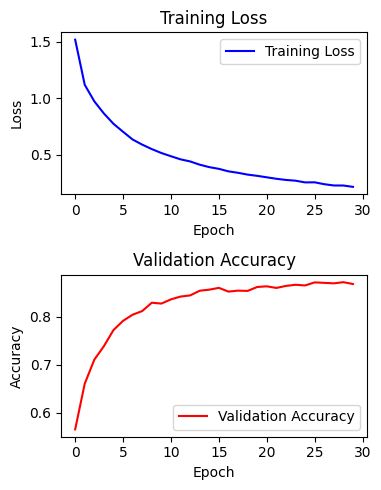

In [9]:
# Visualize training and validation performance
f, ax = plt.subplots(2, 1, figsize=(4, 5))

# Plot training loss
ax[0].plot(train_losses, color='b', label='Training Loss')
ax[0].set_title("Training Loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()

# Plot validation accuracy
ax[1].plot(val_accuracies, color='r', label='Validation Accuracy')
ax[1].set_title("Validation Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.tight_layout()
plt.show()


3. Second network: Build, train, and test another deep neural network, with an architecture of your choice, but at most 4M (four million) parameters, ensuring the architecture meets this constraint by verifying with model.summary().

In [10]:
# -------------------------
# My model resnet
# -------------------------
import torch.nn.functional as F
import torch.nn as nn
import torch

class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(channels, channels // reduction, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return x * self.fc(x)


class ResBlock(nn.Module):
    def __init__(self, in_c, out_c, dropout=0.05):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_c, out_c, 3, padding=1),
            nn.BatchNorm2d(out_c),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout),

            nn.Conv2d(out_c, out_c, 3, padding=1),
            nn.BatchNorm2d(out_c),
        )

        self.shortcut = nn.Conv2d(in_c, out_c, 1) if in_c != out_c else nn.Identity()
        self.se = SEBlock(out_c)

    def forward(self, x):
        out = self.conv(x)
        out = self.se(out)
        return F.relu(out + self.shortcut(x))


class BetterCNN(nn.Module):
    def __init__(self):
        super().__init__()

        # keep original width
        self.stem = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )

        self.layer1 = nn.Sequential(
            ResBlock(64, 128),
            nn.MaxPool2d(2)
        )

        self.layer2 = nn.Sequential(
            ResBlock(128, 256),
            nn.MaxPool2d(2)
        )

        self.layer3 = nn.Sequential(
            ResBlock(256, 278),
            nn.MaxPool2d(2)
        )

        self.layer4 = nn.Sequential(
            ResBlock(278, 278)
        )

        self.gap = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(278, 10)

    def forward(self, x):
        x = self.stem(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.gap(x)
        x = torch.flatten(x, 1)
        return self.fc(x)


model = BetterCNN().to(device)


In [11]:
# -------------------------
# Count Trainable Parameters
# -------------------------
def count_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

params = count_params(model)
print(f"\nTotal Trainable Parameters: {params:,}")



Total Trainable Parameters: 3,986,382


In [12]:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

# CIFAR-10 normalization constants
CIFAR10_MEAN = (0.4914, 0.4822, 0.4465)
CIFAR10_STD  = (0.2023, 0.1994, 0.2010)

# -------------------------
# Training Transformations
# -------------------------
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomRotation(degrees=15),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
    transforms.RandomGrayscale(p=0.07),
    transforms.ToTensor(),
    transforms.Normalize(CIFAR10_MEAN, CIFAR10_STD),
    transforms.RandomErasing(p=0.9, scale=(0.02, 0.15), ratio=(0.3, 3.3), value=0, inplace=False)
])

# -------------------------
# Validation/Test Transformations
# -------------------------
val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(CIFAR10_MEAN, CIFAR10_STD),
])

# -------------------------
# Convert EXISTING NumPy arrays → torch dataset using transforms
# -------------------------

class NumpyCIFAR(torch.utils.data.Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img = self.images[idx]
        label = int(self.labels[idx])
        
        # convert from NumPy (H,W,C) → PIL Image for transforms
        img = transforms.ToPILImage()(img)
        if self.transform:
            img = self.transform(img)
        return img, label

# create datasets with transforms
train_dataset = NumpyCIFAR(X_train, y_train, transform=train_transform)
val_dataset   = NumpyCIFAR(X_val,   y_val,   transform=val_transform)
test_dataset  = NumpyCIFAR(X_test,  y_test,  transform=val_transform)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=256, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=256, shuffle=False)

print("DataLoaders with augmentation are ready.")


DataLoaders with augmentation are ready.


In [13]:
# -------------------------
# Label Smoothing Cross Entropy
# -------------------------
class LabelSmoothingCrossEntropy(nn.Module):
    def __init__(self, smoothing=0.1):
        super().__init__()
        assert 0.0 <= smoothing < 1.0
        self.s = smoothing

    def forward(self, logits, target):
        n_classes = logits.size(-1)

        # log probabilities
        log_probs = F.log_softmax(logits, dim=-1)

        # create smoothed targets
        with torch.no_grad():
            true = torch.zeros_like(log_probs)
            true.fill_(self.s / (n_classes - 1))
            true.scatter_(1, target.unsqueeze(1), 1 - self.s)

        return -(true * log_probs).sum(dim=1).mean()


In [14]:
# Assuming optim and device are defined elsewhere
import torch.optim as optim 

criterion = LabelSmoothingCrossEntropy(smoothing=0.05)

# MODIFICATION: Added weight_decay (L2 regularization)
optimizer = optim.SGD(
    model.parameters(),
    lr=0.05,
    momentum=0.9,
    weight_decay=5e-4,
    nesterov=True
)
scheduler = optim.lr_scheduler.CosineAnnealingLR(
    optimizer,
    T_max = 300,
    eta_min = 1e-6
)

# Setup for Gradient Clipping
MAX_NORM = 10.0

# Early stopping
best_val_acc = 0
patience = 300
wait = 0

train_losses = []
val_accuracies = []

In [15]:
import torch
import numpy as np
import random
import torch.nn.functional as F

def cutmix_data(x, y, alpha=1.0):
    """
    x: batch images (B,C,H,W)
    y: batch labels (B,)
    returns: mixed_x, y_a, y_b, lambda
    """

    if alpha <= 0:
        return x, y, y, 1.0

    lam = np.random.beta(alpha, alpha)

    batch_size = x.size(0)
    index = torch.randperm(batch_size).to(x.device)

    y_a = y
    y_b = y[index]

    # bounding box
    _, _, H, W = x.size()
    cut_w = int(W * np.sqrt(1 - lam))
    cut_h = int(H * np.sqrt(1 - lam))

    # random center
    cx = np.random.randint(W)
    cy = np.random.randint(H)

    x1 = np.clip(cx - cut_w // 2, 0, W)
    x2 = np.clip(cx + cut_w // 2, 0, W)
    y1 = np.clip(cy - cut_h // 2, 0, H)
    y2 = np.clip(cy + cut_h // 2, 0, H)

    # apply patch
    x[:, :, y1:y2, x1:x2] = x[index][:, :, y1:y2, x1:x2]

    lam = 1 - ((x2 - x1) * (y2 - y1)) / (W * H)

    return x, y_a, y_b, lam


In [16]:
def train_one_epoch():
    model.train()
    total_loss = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        # apply cutmix
        X_cut, y_a, y_b, lam = cutmix_data(X, y, alpha=1.0)

        # forward
        out = model(X_cut)

        # compute mixed loss
        loss = lam * criterion(out, y_a) + (1 - lam) * criterion(out, y_b)

        loss.backward()
        
        # >>> MODIFICATION: Gradient Clipping
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=MAX_NORM)
        
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(train_loader)


def evaluate(loader):
    model.eval()
    correct, total = 0, 0

    with torch.no_grad():
        for X, y in loader:
            X, y = X.to(device), y.to(device)
            pred = model(X).argmax(1)
            correct += (pred == y).sum().item()
            total += y.size(0)

    return correct / total

In [17]:
# -------------------------
# Train (with checkpoint saving)
# -------------------------

import os

# Make sure checkpoint folder exists
os.makedirs("checkpoints", exist_ok=True)
BEST_MODEL_PATH = "checkpoints/best_model.pt"

for epoch in range(1, 601):

    train_loss = train_one_epoch()
    val_acc = evaluate(val_loader)

    train_losses.append(train_loss)
    val_accuracies.append(val_acc)

    if epoch <= 299:
        scheduler.step()

    print(f"Epoch {epoch:02d} | Loss: {train_loss:.4f} | Val Acc: {val_acc:.4f}")

    # EARLY STOP & SAVE BEST CHECKPOINT
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        wait = 0
        best_state = model.state_dict()  # keep copy in RAM
        
        # --- SAVE TO DISK (important if session dies) ---
        torch.save(best_state, BEST_MODEL_PATH)
        print(f"  ➤ New best model saved at epoch {epoch} (val_acc={val_acc:.4f})")
    else:
        wait += 1
        if wait >= patience:
            print("\nEarly stopping triggered.")
            break

# Load best model (whether early stopped or completed)
model.load_state_dict(best_state)
print("\nBest validation accuracy:", best_val_acc)


Epoch 01 | Loss: 1.9470 | Val Acc: 0.4720
  ➤ New best model saved at epoch 1 (val_acc=0.4720)


Epoch 02 | Loss: 1.7751 | Val Acc: 0.6272
  ➤ New best model saved at epoch 2 (val_acc=0.6272)


Epoch 03 | Loss: 1.6844 | Val Acc: 0.6230


Epoch 04 | Loss: 1.6476 | Val Acc: 0.6764
  ➤ New best model saved at epoch 4 (val_acc=0.6764)


Epoch 05 | Loss: 1.5879 | Val Acc: 0.6954
  ➤ New best model saved at epoch 5 (val_acc=0.6954)


Epoch 06 | Loss: 1.5470 | Val Acc: 0.7522
  ➤ New best model saved at epoch 6 (val_acc=0.7522)


Epoch 07 | Loss: 1.5117 | Val Acc: 0.7802
  ➤ New best model saved at epoch 7 (val_acc=0.7802)


Epoch 08 | Loss: 1.5146 | Val Acc: 0.7954
  ➤ New best model saved at epoch 8 (val_acc=0.7954)


Epoch 09 | Loss: 1.4767 | Val Acc: 0.7946


Epoch 10 | Loss: 1.4419 | Val Acc: 0.7956
  ➤ New best model saved at epoch 10 (val_acc=0.7956)


Epoch 11 | Loss: 1.4649 | Val Acc: 0.8206
  ➤ New best model saved at epoch 11 (val_acc=0.8206)


Epoch 12 | Loss: 1.4397 | Val Acc: 0.8198


Epoch 13 | Loss: 1.4503 | Val Acc: 0.8040


Epoch 14 | Loss: 1.4179 | Val Acc: 0.8272


  ➤ New best model saved at epoch 14 (val_acc=0.8272)


Epoch 15 | Loss: 1.4074 | Val Acc: 0.8164


Epoch 16 | Loss: 1.3812 | Val Acc: 0.8064


Epoch 17 | Loss: 1.4037 | Val Acc: 0.8322
  ➤ New best model saved at epoch 17 (val_acc=0.8322)


Epoch 18 | Loss: 1.3945 | Val Acc: 0.8454
  ➤ New best model saved at epoch 18 (val_acc=0.8454)


Epoch 19 | Loss: 1.3684 | Val Acc: 0.8508
  ➤ New best model saved at epoch 19 (val_acc=0.8508)


Epoch 20 | Loss: 1.3964 | Val Acc: 0.8410


Epoch 21 | Loss: 1.3663 | Val Acc: 0.8440


Epoch 22 | Loss: 1.3538 | Val Acc: 0.8660
  ➤ New best model saved at epoch 22 (val_acc=0.8660)


Epoch 23 | Loss: 1.3227 | Val Acc: 0.8378


Epoch 24 | Loss: 1.3615 | Val Acc: 0.8704
  ➤ New best model saved at epoch 24 (val_acc=0.8704)


Epoch 25 | Loss: 1.3630 | Val Acc: 0.8612


Epoch 26 | Loss: 1.3145 | Val Acc: 0.8704


Epoch 27 | Loss: 1.3680 | Val Acc: 0.8586


Epoch 28 | Loss: 1.3081 | Val Acc: 0.8700


Epoch 29 | Loss: 1.3414 | Val Acc: 0.8738
  ➤ New best model saved at epoch 29 (val_acc=0.8738)


Epoch 30 | Loss: 1.3367 | Val Acc: 0.8732


Epoch 31 | Loss: 1.2972 | Val Acc: 0.8820
  ➤ New best model saved at epoch 31 (val_acc=0.8820)


Epoch 32 | Loss: 1.3415 | Val Acc: 0.8860
  ➤ New best model saved at epoch 32 (val_acc=0.8860)


Epoch 33 | Loss: 1.3427 | Val Acc: 0.8848


Epoch 34 | Loss: 1.3254 | Val Acc: 0.8874
  ➤ New best model saved at epoch 34 (val_acc=0.8874)


Epoch 35 | Loss: 1.3354 | Val Acc: 0.8782


Epoch 36 | Loss: 1.3197 | Val Acc: 0.8666


Epoch 37 | Loss: 1.2867 | Val Acc: 0.8786


Epoch 38 | Loss: 1.2865 | Val Acc: 0.8862


Epoch 39 | Loss: 1.3313 | Val Acc: 0.8628


Epoch 40 | Loss: 1.3119 | Val Acc: 0.8740


Epoch 41 | Loss: 1.2890 | Val Acc: 0.8652


Epoch 42 | Loss: 1.3146 | Val Acc: 0.8812


Epoch 43 | Loss: 1.3113 | Val Acc: 0.8912
  ➤ New best model saved at epoch 43 (val_acc=0.8912)


Epoch 44 | Loss: 1.2966 | Val Acc: 0.8562


Epoch 45 | Loss: 1.2790 | Val Acc: 0.8944
  ➤ New best model saved at epoch 45 (val_acc=0.8944)


Epoch 46 | Loss: 1.2544 | Val Acc: 0.9006
  ➤ New best model saved at epoch 46 (val_acc=0.9006)


Epoch 47 | Loss: 1.2550 | Val Acc: 0.8926


Epoch 48 | Loss: 1.2806 | Val Acc: 0.8894


Epoch 49 | Loss: 1.2683 | Val Acc: 0.8736


Epoch 50 | Loss: 1.2958 | Val Acc: 0.8828


Epoch 51 | Loss: 1.2654 | Val Acc: 0.8882


Epoch 52 | Loss: 1.2654 | Val Acc: 0.8962


Epoch 53 | Loss: 1.2418 | Val Acc: 0.9028
  ➤ New best model saved at epoch 53 (val_acc=0.9028)


Epoch 54 | Loss: 1.2932 | Val Acc: 0.8860


Epoch 55 | Loss: 1.2867 | Val Acc: 0.8858


Epoch 56 | Loss: 1.2762 | Val Acc: 0.8916


Epoch 57 | Loss: 1.2640 | Val Acc: 0.9002


Epoch 58 | Loss: 1.2595 | Val Acc: 0.8854


Epoch 59 | Loss: 1.2521 | Val Acc: 0.8870


Epoch 60 | Loss: 1.2488 | Val Acc: 0.9002


Epoch 61 | Loss: 1.2902 | Val Acc: 0.8894


Epoch 62 | Loss: 1.2898 | Val Acc: 0.8918


Epoch 63 | Loss: 1.2380 | Val Acc: 0.8922


Epoch 64 | Loss: 1.2475 | Val Acc: 0.8972


Epoch 65 | Loss: 1.2495 | Val Acc: 0.8956


Epoch 66 | Loss: 1.2719 | Val Acc: 0.9012


Epoch 67 | Loss: 1.2759 | Val Acc: 0.9052
  ➤ New best model saved at epoch 67 (val_acc=0.9052)


Epoch 68 | Loss: 1.2602 | Val Acc: 0.9024


Epoch 69 | Loss: 1.2669 | Val Acc: 0.8878


Epoch 70 | Loss: 1.2460 | Val Acc: 0.9104
  ➤ New best model saved at epoch 70 (val_acc=0.9104)


Epoch 71 | Loss: 1.2499 | Val Acc: 0.9038


Epoch 72 | Loss: 1.2345 | Val Acc: 0.8910


Epoch 73 | Loss: 1.2705 | Val Acc: 0.9036


Epoch 74 | Loss: 1.2554 | Val Acc: 0.9082


Epoch 75 | Loss: 1.2764 | Val Acc: 0.8900


Epoch 76 | Loss: 1.2354 | Val Acc: 0.8924


Epoch 77 | Loss: 1.2531 | Val Acc: 0.8890


Epoch 78 | Loss: 1.2522 | Val Acc: 0.9064


Epoch 79 | Loss: 1.2690 | Val Acc: 0.8970


Epoch 80 | Loss: 1.2633 | Val Acc: 0.8948


Epoch 81 | Loss: 1.2430 | Val Acc: 0.8884


Epoch 82 | Loss: 1.2436 | Val Acc: 0.9020


Epoch 83 | Loss: 1.2408 | Val Acc: 0.9048


Epoch 84 | Loss: 1.2349 | Val Acc: 0.9072


Epoch 85 | Loss: 1.2030 | Val Acc: 0.9072


Epoch 86 | Loss: 1.2189 | Val Acc: 0.9070


Epoch 87 | Loss: 1.2526 | Val Acc: 0.8916


Epoch 88 | Loss: 1.2399 | Val Acc: 0.9110
  ➤ New best model saved at epoch 88 (val_acc=0.9110)


Epoch 89 | Loss: 1.2332 | Val Acc: 0.8962


Epoch 90 | Loss: 1.2205 | Val Acc: 0.9070


Epoch 91 | Loss: 1.2328 | Val Acc: 0.9088


Epoch 92 | Loss: 1.2105 | Val Acc: 0.9032


Epoch 93 | Loss: 1.2361 | Val Acc: 0.8822


Epoch 94 | Loss: 1.2164 | Val Acc: 0.8878


Epoch 95 | Loss: 1.1971 | Val Acc: 0.8978


Epoch 96 | Loss: 1.2234 | Val Acc: 0.9092


Epoch 97 | Loss: 1.2119 | Val Acc: 0.8970


Epoch 98 | Loss: 1.2205 | Val Acc: 0.8968


Epoch 99 | Loss: 1.2267 | Val Acc: 0.9054


Epoch 100 | Loss: 1.2015 | Val Acc: 0.9182
  ➤ New best model saved at epoch 100 (val_acc=0.9182)


Epoch 101 | Loss: 1.2046 | Val Acc: 0.9098


Epoch 102 | Loss: 1.2064 | Val Acc: 0.8924


Epoch 103 | Loss: 1.2267 | Val Acc: 0.8846


Epoch 104 | Loss: 1.2351 | Val Acc: 0.9188
  ➤ New best model saved at epoch 104 (val_acc=0.9188)


Epoch 105 | Loss: 1.2190 | Val Acc: 0.9092


Epoch 106 | Loss: 1.2267 | Val Acc: 0.9110


Epoch 107 | Loss: 1.1929 | Val Acc: 0.9088


Epoch 108 | Loss: 1.2254 | Val Acc: 0.8986


Epoch 109 | Loss: 1.1976 | Val Acc: 0.9044


Epoch 110 | Loss: 1.1885 | Val Acc: 0.9182


Epoch 111 | Loss: 1.2439 | Val Acc: 0.8992


Epoch 112 | Loss: 1.1925 | Val Acc: 0.9064


Epoch 113 | Loss: 1.1813 | Val Acc: 0.9024


Epoch 114 | Loss: 1.2449 | Val Acc: 0.9050


Epoch 115 | Loss: 1.1946 | Val Acc: 0.9110


Epoch 116 | Loss: 1.1782 | Val Acc: 0.9074


Epoch 117 | Loss: 1.1885 | Val Acc: 0.9052


Epoch 118 | Loss: 1.1841 | Val Acc: 0.9220
  ➤ New best model saved at epoch 118 (val_acc=0.9220)


Epoch 119 | Loss: 1.2278 | Val Acc: 0.9046


Epoch 120 | Loss: 1.1897 | Val Acc: 0.9112


Epoch 121 | Loss: 1.1643 | Val Acc: 0.8992


Epoch 122 | Loss: 1.1825 | Val Acc: 0.9022


Epoch 123 | Loss: 1.2054 | Val Acc: 0.9036


Epoch 124 | Loss: 1.1772 | Val Acc: 0.9062


Epoch 125 | Loss: 1.1680 | Val Acc: 0.9094


Epoch 126 | Loss: 1.1746 | Val Acc: 0.9168


Epoch 127 | Loss: 1.1813 | Val Acc: 0.9152


Epoch 128 | Loss: 1.1866 | Val Acc: 0.8948


Epoch 129 | Loss: 1.1935 | Val Acc: 0.9002


Epoch 130 | Loss: 1.1681 | Val Acc: 0.9170


Epoch 131 | Loss: 1.1901 | Val Acc: 0.9132


Epoch 132 | Loss: 1.1806 | Val Acc: 0.9224
  ➤ New best model saved at epoch 132 (val_acc=0.9224)


Epoch 133 | Loss: 1.1817 | Val Acc: 0.9160


Epoch 134 | Loss: 1.1582 | Val Acc: 0.9180


Epoch 135 | Loss: 1.1860 | Val Acc: 0.9072


Epoch 136 | Loss: 1.1851 | Val Acc: 0.9174


Epoch 137 | Loss: 1.1951 | Val Acc: 0.9252
  ➤ New best model saved at epoch 137 (val_acc=0.9252)


Epoch 138 | Loss: 1.1755 | Val Acc: 0.9082


Epoch 139 | Loss: 1.1814 | Val Acc: 0.9224


Epoch 140 | Loss: 1.1641 | Val Acc: 0.9238


Epoch 141 | Loss: 1.1400 | Val Acc: 0.9236


Epoch 142 | Loss: 1.1519 | Val Acc: 0.9280
  ➤ New best model saved at epoch 142 (val_acc=0.9280)


Epoch 143 | Loss: 1.1442 | Val Acc: 0.9164


Epoch 144 | Loss: 1.1364 | Val Acc: 0.9250


Epoch 145 | Loss: 1.1902 | Val Acc: 0.9250


Epoch 146 | Loss: 1.1526 | Val Acc: 0.9248


Epoch 147 | Loss: 1.1536 | Val Acc: 0.9220


Epoch 148 | Loss: 1.2033 | Val Acc: 0.9194


Epoch 149 | Loss: 1.1526 | Val Acc: 0.8948


Epoch 150 | Loss: 1.1582 | Val Acc: 0.9254


Epoch 151 | Loss: 1.1623 | Val Acc: 0.9180


Epoch 152 | Loss: 1.1778 | Val Acc: 0.9218


Epoch 153 | Loss: 1.1719 | Val Acc: 0.9232


Epoch 154 | Loss: 1.1566 | Val Acc: 0.9236


Epoch 155 | Loss: 1.1685 | Val Acc: 0.9180


Epoch 156 | Loss: 1.1373 | Val Acc: 0.9204


Epoch 157 | Loss: 1.1485 | Val Acc: 0.9196


Epoch 158 | Loss: 1.1326 | Val Acc: 0.9232


Epoch 159 | Loss: 1.1481 | Val Acc: 0.9278


Epoch 160 | Loss: 1.1788 | Val Acc: 0.9196


Epoch 161 | Loss: 1.1330 | Val Acc: 0.9140


Epoch 162 | Loss: 1.1360 | Val Acc: 0.9304
  ➤ New best model saved at epoch 162 (val_acc=0.9304)


Epoch 163 | Loss: 1.1765 | Val Acc: 0.9286


Epoch 164 | Loss: 1.1370 | Val Acc: 0.9304


Epoch 165 | Loss: 1.1346 | Val Acc: 0.9316
  ➤ New best model saved at epoch 165 (val_acc=0.9316)


Epoch 166 | Loss: 1.1700 | Val Acc: 0.9282


Epoch 167 | Loss: 1.1456 | Val Acc: 0.9278


Epoch 168 | Loss: 1.1226 | Val Acc: 0.9274


Epoch 169 | Loss: 1.1341 | Val Acc: 0.9278


Epoch 170 | Loss: 1.1314 | Val Acc: 0.9210


Epoch 171 | Loss: 1.1274 | Val Acc: 0.9324
  ➤ New best model saved at epoch 171 (val_acc=0.9324)


Epoch 172 | Loss: 1.1107 | Val Acc: 0.9254


Epoch 173 | Loss: 1.1376 | Val Acc: 0.9346
  ➤ New best model saved at epoch 173 (val_acc=0.9346)


Epoch 174 | Loss: 1.1102 | Val Acc: 0.9336


Epoch 175 | Loss: 1.1618 | Val Acc: 0.9300


Epoch 176 | Loss: 1.1450 | Val Acc: 0.9246


Epoch 177 | Loss: 1.1188 | Val Acc: 0.9340


Epoch 178 | Loss: 1.1062 | Val Acc: 0.9292


Epoch 179 | Loss: 1.1072 | Val Acc: 0.9322


Epoch 180 | Loss: 1.1158 | Val Acc: 0.9326


Epoch 181 | Loss: 1.1257 | Val Acc: 0.9360
  ➤ New best model saved at epoch 181 (val_acc=0.9360)


Epoch 182 | Loss: 1.1240 | Val Acc: 0.9306


Epoch 183 | Loss: 1.0852 | Val Acc: 0.9360


Epoch 184 | Loss: 1.1320 | Val Acc: 0.9382
  ➤ New best model saved at epoch 184 (val_acc=0.9382)


Epoch 185 | Loss: 1.1257 | Val Acc: 0.9326


Epoch 186 | Loss: 1.1140 | Val Acc: 0.9378


Epoch 187 | Loss: 1.1204 | Val Acc: 0.9278


Epoch 188 | Loss: 1.1419 | Val Acc: 0.9406
  ➤ New best model saved at epoch 188 (val_acc=0.9406)


Epoch 189 | Loss: 1.1113 | Val Acc: 0.9354


Epoch 190 | Loss: 1.1050 | Val Acc: 0.9420
  ➤ New best model saved at epoch 190 (val_acc=0.9420)


Epoch 191 | Loss: 1.1342 | Val Acc: 0.9354


Epoch 192 | Loss: 1.0992 | Val Acc: 0.9308


Epoch 193 | Loss: 1.1351 | Val Acc: 0.9314


Epoch 194 | Loss: 1.0799 | Val Acc: 0.9378


Epoch 195 | Loss: 1.0965 | Val Acc: 0.9354


Epoch 196 | Loss: 1.0951 | Val Acc: 0.9338


Epoch 197 | Loss: 1.1146 | Val Acc: 0.9354


Epoch 198 | Loss: 1.1336 | Val Acc: 0.9324


Epoch 199 | Loss: 1.1136 | Val Acc: 0.9352


Epoch 200 | Loss: 1.0708 | Val Acc: 0.9422
  ➤ New best model saved at epoch 200 (val_acc=0.9422)


Epoch 201 | Loss: 1.0536 | Val Acc: 0.9440
  ➤ New best model saved at epoch 201 (val_acc=0.9440)


Epoch 202 | Loss: 1.1105 | Val Acc: 0.9258


Epoch 203 | Loss: 1.1046 | Val Acc: 0.9336


Epoch 204 | Loss: 1.0961 | Val Acc: 0.9424


Epoch 205 | Loss: 1.0962 | Val Acc: 0.9350


Epoch 206 | Loss: 1.0706 | Val Acc: 0.9258


Epoch 207 | Loss: 1.0932 | Val Acc: 0.9402


Epoch 208 | Loss: 1.0735 | Val Acc: 0.9432


Epoch 209 | Loss: 1.0816 | Val Acc: 0.9414


Epoch 210 | Loss: 1.0680 | Val Acc: 0.9410


Epoch 211 | Loss: 1.0927 | Val Acc: 0.9432


Epoch 212 | Loss: 1.0849 | Val Acc: 0.9458
  ➤ New best model saved at epoch 212 (val_acc=0.9458)


Epoch 213 | Loss: 1.0932 | Val Acc: 0.9374


Epoch 214 | Loss: 1.0820 | Val Acc: 0.9412


Epoch 215 | Loss: 1.0653 | Val Acc: 0.9394


Epoch 216 | Loss: 1.0984 | Val Acc: 0.9418


Epoch 217 | Loss: 1.0809 | Val Acc: 0.9408


Epoch 218 | Loss: 1.0526 | Val Acc: 0.9424


Epoch 219 | Loss: 1.0758 | Val Acc: 0.9446


Epoch 220 | Loss: 1.0800 | Val Acc: 0.9462
  ➤ New best model saved at epoch 220 (val_acc=0.9462)


Epoch 221 | Loss: 1.0731 | Val Acc: 0.9428


Epoch 222 | Loss: 1.0544 | Val Acc: 0.9478
  ➤ New best model saved at epoch 222 (val_acc=0.9478)


Epoch 223 | Loss: 1.0405 | Val Acc: 0.9492
  ➤ New best model saved at epoch 223 (val_acc=0.9492)


Epoch 224 | Loss: 1.0488 | Val Acc: 0.9446


Epoch 225 | Loss: 1.0322 | Val Acc: 0.9466


Epoch 226 | Loss: 1.0705 | Val Acc: 0.9426


Epoch 227 | Loss: 1.0037 | Val Acc: 0.9430


Epoch 228 | Loss: 1.0768 | Val Acc: 0.9428


Epoch 229 | Loss: 1.0552 | Val Acc: 0.9498
  ➤ New best model saved at epoch 229 (val_acc=0.9498)


Epoch 230 | Loss: 1.0405 | Val Acc: 0.9488


Epoch 231 | Loss: 1.0512 | Val Acc: 0.9434


Epoch 232 | Loss: 1.0631 | Val Acc: 0.9462


Epoch 233 | Loss: 1.0414 | Val Acc: 0.9472


Epoch 234 | Loss: 1.0577 | Val Acc: 0.9486


Epoch 235 | Loss: 1.0308 | Val Acc: 0.9478


Epoch 236 | Loss: 1.0651 | Val Acc: 0.9464


Epoch 237 | Loss: 1.0198 | Val Acc: 0.9484


Epoch 238 | Loss: 1.0317 | Val Acc: 0.9478


Epoch 239 | Loss: 1.0529 | Val Acc: 0.9488


Epoch 240 | Loss: 1.0328 | Val Acc: 0.9514
  ➤ New best model saved at epoch 240 (val_acc=0.9514)


Epoch 241 | Loss: 1.0732 | Val Acc: 0.9494


Epoch 242 | Loss: 1.0008 | Val Acc: 0.9496


Epoch 243 | Loss: 1.0281 | Val Acc: 0.9504


Epoch 244 | Loss: 1.0164 | Val Acc: 0.9490


Epoch 245 | Loss: 1.0314 | Val Acc: 0.9516
  ➤ New best model saved at epoch 245 (val_acc=0.9516)


Epoch 246 | Loss: 1.0285 | Val Acc: 0.9518
  ➤ New best model saved at epoch 246 (val_acc=0.9518)


Epoch 247 | Loss: 1.0298 | Val Acc: 0.9488


Epoch 248 | Loss: 1.0238 | Val Acc: 0.9512


Epoch 249 | Loss: 0.9971 | Val Acc: 0.9516


Epoch 250 | Loss: 1.0188 | Val Acc: 0.9510


Epoch 251 | Loss: 1.0217 | Val Acc: 0.9532
  ➤ New best model saved at epoch 251 (val_acc=0.9532)


Epoch 252 | Loss: 0.9976 | Val Acc: 0.9492


Epoch 253 | Loss: 1.0088 | Val Acc: 0.9522


Epoch 254 | Loss: 1.0425 | Val Acc: 0.9516


Epoch 255 | Loss: 1.0042 | Val Acc: 0.9490


Epoch 256 | Loss: 0.9850 | Val Acc: 0.9558
  ➤ New best model saved at epoch 256 (val_acc=0.9558)


Epoch 257 | Loss: 0.9841 | Val Acc: 0.9552


Epoch 258 | Loss: 1.0269 | Val Acc: 0.9530


Epoch 259 | Loss: 1.0366 | Val Acc: 0.9518


Epoch 260 | Loss: 0.9869 | Val Acc: 0.9542


Epoch 261 | Loss: 1.0050 | Val Acc: 0.9546


Epoch 262 | Loss: 0.9978 | Val Acc: 0.9552


Epoch 263 | Loss: 1.0052 | Val Acc: 0.9542


Epoch 264 | Loss: 1.0012 | Val Acc: 0.9560
  ➤ New best model saved at epoch 264 (val_acc=0.9560)


Epoch 265 | Loss: 0.9794 | Val Acc: 0.9518


Epoch 266 | Loss: 0.9837 | Val Acc: 0.9528


Epoch 267 | Loss: 0.9486 | Val Acc: 0.9550


Epoch 268 | Loss: 0.9874 | Val Acc: 0.9506


Epoch 269 | Loss: 0.9596 | Val Acc: 0.9556


Epoch 270 | Loss: 0.9630 | Val Acc: 0.9552


Epoch 271 | Loss: 0.9924 | Val Acc: 0.9548


Epoch 272 | Loss: 0.9848 | Val Acc: 0.9558


Epoch 273 | Loss: 1.0123 | Val Acc: 0.9558


Epoch 274 | Loss: 1.0008 | Val Acc: 0.9552


Epoch 275 | Loss: 1.0031 | Val Acc: 0.9536


Epoch 276 | Loss: 0.9956 | Val Acc: 0.9534


Epoch 277 | Loss: 0.9904 | Val Acc: 0.9544


Epoch 278 | Loss: 0.9889 | Val Acc: 0.9544


Epoch 279 | Loss: 0.9679 | Val Acc: 0.9542


Epoch 280 | Loss: 1.0068 | Val Acc: 0.9552


Epoch 281 | Loss: 0.9821 | Val Acc: 0.9548


Epoch 282 | Loss: 0.9857 | Val Acc: 0.9540


Epoch 283 | Loss: 0.9431 | Val Acc: 0.9552


Epoch 284 | Loss: 0.9853 | Val Acc: 0.9538


Epoch 285 | Loss: 0.9811 | Val Acc: 0.9542


Epoch 286 | Loss: 0.9445 | Val Acc: 0.9550


Epoch 287 | Loss: 0.9901 | Val Acc: 0.9546


Epoch 288 | Loss: 0.9651 | Val Acc: 0.9552


Epoch 289 | Loss: 0.9729 | Val Acc: 0.9556


Epoch 290 | Loss: 0.9448 | Val Acc: 0.9538


Epoch 291 | Loss: 0.9742 | Val Acc: 0.9542


Epoch 292 | Loss: 0.9675 | Val Acc: 0.9540


Epoch 293 | Loss: 0.9793 | Val Acc: 0.9540


Epoch 294 | Loss: 0.9661 | Val Acc: 0.9552


Epoch 295 | Loss: 0.9926 | Val Acc: 0.9556


Epoch 296 | Loss: 0.9862 | Val Acc: 0.9560


Epoch 297 | Loss: 0.9851 | Val Acc: 0.9544


Epoch 298 | Loss: 0.9750 | Val Acc: 0.9536


Epoch 299 | Loss: 0.9549 | Val Acc: 0.9554


Epoch 300 | Loss: 0.9761 | Val Acc: 0.9554


Epoch 301 | Loss: 0.9858 | Val Acc: 0.9562


  ➤ New best model saved at epoch 301 (val_acc=0.9562)


Epoch 302 | Loss: 0.9681 | Val Acc: 0.9546


Epoch 303 | Loss: 0.9594 | Val Acc: 0.9560


Epoch 304 | Loss: 0.9723 | Val Acc: 0.9552


Epoch 305 | Loss: 0.9699 | Val Acc: 0.9560


Epoch 306 | Loss: 0.9524 | Val Acc: 0.9554


Epoch 307 | Loss: 0.9706 | Val Acc: 0.9544


Epoch 308 | Loss: 0.9642 | Val Acc: 0.9548


Epoch 309 | Loss: 0.9924 | Val Acc: 0.9552


Epoch 310 | Loss: 0.9822 | Val Acc: 0.9550


Epoch 311 | Loss: 0.9640 | Val Acc: 0.9548


Epoch 312 | Loss: 0.9884 | Val Acc: 0.9546


Epoch 313 | Loss: 0.9677 | Val Acc: 0.9548


Epoch 314 | Loss: 0.9886 | Val Acc: 0.9548


Epoch 315 | Loss: 1.0100 | Val Acc: 0.9556


Epoch 316 | Loss: 0.9535 | Val Acc: 0.9552


Epoch 317 | Loss: 0.9581 | Val Acc: 0.9546


Epoch 318 | Loss: 0.9870 | Val Acc: 0.9562


Epoch 319 | Loss: 0.9749 | Val Acc: 0.9538


Epoch 320 | Loss: 0.9657 | Val Acc: 0.9560


Epoch 321 | Loss: 0.9663 | Val Acc: 0.9548


Epoch 322 | Loss: 0.9564 | Val Acc: 0.9544


Epoch 323 | Loss: 0.9458 | Val Acc: 0.9560


Epoch 324 | Loss: 0.9655 | Val Acc: 0.9560


Epoch 325 | Loss: 0.9778 | Val Acc: 0.9552


Epoch 326 | Loss: 0.9470 | Val Acc: 0.9560


Epoch 327 | Loss: 0.9695 | Val Acc: 0.9542


Epoch 328 | Loss: 0.9764 | Val Acc: 0.9554


Epoch 329 | Loss: 0.9862 | Val Acc: 0.9550


Epoch 330 | Loss: 0.9622 | Val Acc: 0.9554


Epoch 331 | Loss: 0.9998 | Val Acc: 0.9546


Epoch 332 | Loss: 0.9802 | Val Acc: 0.9548


Epoch 333 | Loss: 0.9666 | Val Acc: 0.9540


Epoch 334 | Loss: 0.9846 | Val Acc: 0.9550


Epoch 335 | Loss: 0.9701 | Val Acc: 0.9546


Epoch 336 | Loss: 0.9999 | Val Acc: 0.9546


Epoch 337 | Loss: 0.9778 | Val Acc: 0.9554


Epoch 338 | Loss: 0.9887 | Val Acc: 0.9558


Epoch 339 | Loss: 0.9594 | Val Acc: 0.9546


Epoch 340 | Loss: 0.9748 | Val Acc: 0.9548


Epoch 341 | Loss: 0.9795 | Val Acc: 0.9556


Epoch 342 | Loss: 0.9892 | Val Acc: 0.9544


Epoch 343 | Loss: 0.9849 | Val Acc: 0.9548


Epoch 344 | Loss: 0.9783 | Val Acc: 0.9552


Epoch 345 | Loss: 0.9315 | Val Acc: 0.9546


Epoch 346 | Loss: 1.0070 | Val Acc: 0.9552


Epoch 347 | Loss: 0.9949 | Val Acc: 0.9546


Epoch 348 | Loss: 0.9776 | Val Acc: 0.9550


Epoch 349 | Loss: 0.9446 | Val Acc: 0.9554


Epoch 350 | Loss: 0.9947 | Val Acc: 0.9542


Epoch 351 | Loss: 0.9625 | Val Acc: 0.9546


Epoch 352 | Loss: 0.9762 | Val Acc: 0.9548


Epoch 353 | Loss: 1.0184 | Val Acc: 0.9546


Epoch 354 | Loss: 0.9869 | Val Acc: 0.9552


Epoch 355 | Loss: 0.9722 | Val Acc: 0.9560


Epoch 356 | Loss: 0.9697 | Val Acc: 0.9546


Epoch 357 | Loss: 0.9870 | Val Acc: 0.9550


Epoch 358 | Loss: 0.9366 | Val Acc: 0.9546


Epoch 359 | Loss: 1.0087 | Val Acc: 0.9554


Epoch 360 | Loss: 0.9727 | Val Acc: 0.9550


Epoch 361 | Loss: 0.9703 | Val Acc: 0.9552


Epoch 362 | Loss: 1.0068 | Val Acc: 0.9556


Epoch 363 | Loss: 0.9826 | Val Acc: 0.9542


Epoch 364 | Loss: 0.9910 | Val Acc: 0.9548


Epoch 365 | Loss: 0.9454 | Val Acc: 0.9552


Epoch 366 | Loss: 0.9879 | Val Acc: 0.9552


Epoch 367 | Loss: 0.9523 | Val Acc: 0.9554


Epoch 368 | Loss: 1.0019 | Val Acc: 0.9556


Epoch 369 | Loss: 0.9726 | Val Acc: 0.9550


Epoch 370 | Loss: 0.9717 | Val Acc: 0.9548


Epoch 371 | Loss: 0.9596 | Val Acc: 0.9554


Epoch 372 | Loss: 0.9540 | Val Acc: 0.9558


Epoch 373 | Loss: 0.9622 | Val Acc: 0.9552


Epoch 374 | Loss: 0.9452 | Val Acc: 0.9560


Epoch 375 | Loss: 0.9833 | Val Acc: 0.9560


Epoch 376 | Loss: 0.9669 | Val Acc: 0.9552


Epoch 377 | Loss: 1.0094 | Val Acc: 0.9550


Epoch 378 | Loss: 0.9786 | Val Acc: 0.9558


Epoch 379 | Loss: 0.9535 | Val Acc: 0.9550


Epoch 380 | Loss: 0.9820 | Val Acc: 0.9548


Epoch 381 | Loss: 0.9690 | Val Acc: 0.9544


Epoch 382 | Loss: 0.9633 | Val Acc: 0.9548


Epoch 383 | Loss: 0.9599 | Val Acc: 0.9554


Epoch 384 | Loss: 0.9845 | Val Acc: 0.9546


Epoch 385 | Loss: 0.9414 | Val Acc: 0.9548


Epoch 386 | Loss: 0.9612 | Val Acc: 0.9538


Epoch 387 | Loss: 0.9630 | Val Acc: 0.9546


Epoch 388 | Loss: 0.9608 | Val Acc: 0.9542


Epoch 389 | Loss: 0.9525 | Val Acc: 0.9546


Epoch 390 | Loss: 0.9562 | Val Acc: 0.9558


Epoch 391 | Loss: 0.9854 | Val Acc: 0.9550


Epoch 392 | Loss: 0.9833 | Val Acc: 0.9556


Epoch 393 | Loss: 0.9426 | Val Acc: 0.9538


Epoch 394 | Loss: 0.9725 | Val Acc: 0.9542


Epoch 395 | Loss: 0.9688 | Val Acc: 0.9550


Epoch 396 | Loss: 0.9750 | Val Acc: 0.9548


Epoch 397 | Loss: 0.9706 | Val Acc: 0.9550


Epoch 398 | Loss: 0.9356 | Val Acc: 0.9550


Epoch 399 | Loss: 0.9620 | Val Acc: 0.9544


Epoch 400 | Loss: 0.9586 | Val Acc: 0.9554


Epoch 401 | Loss: 0.9786 | Val Acc: 0.9564


  ➤ New best model saved at epoch 401 (val_acc=0.9564)


Epoch 402 | Loss: 0.9855 | Val Acc: 0.9556


Epoch 403 | Loss: 0.9553 | Val Acc: 0.9554


Epoch 404 | Loss: 0.9922 | Val Acc: 0.9548


Epoch 405 | Loss: 1.0111 | Val Acc: 0.9556


Epoch 406 | Loss: 0.9621 | Val Acc: 0.9554


Epoch 407 | Loss: 0.9719 | Val Acc: 0.9554


Epoch 408 | Loss: 0.9636 | Val Acc: 0.9556


Epoch 409 | Loss: 0.9715 | Val Acc: 0.9546


Epoch 410 | Loss: 0.9566 | Val Acc: 0.9540


Epoch 411 | Loss: 0.9752 | Val Acc: 0.9552


Epoch 412 | Loss: 0.9841 | Val Acc: 0.9552


Epoch 413 | Loss: 0.9619 | Val Acc: 0.9556


Epoch 414 | Loss: 0.9612 | Val Acc: 0.9546


Epoch 415 | Loss: 0.9935 | Val Acc: 0.9558


Epoch 416 | Loss: 0.9229 | Val Acc: 0.9538


Epoch 417 | Loss: 0.9766 | Val Acc: 0.9538


Epoch 418 | Loss: 0.9725 | Val Acc: 0.9552


Epoch 419 | Loss: 0.9658 | Val Acc: 0.9554


Epoch 420 | Loss: 1.0117 | Val Acc: 0.9546


Epoch 421 | Loss: 0.9749 | Val Acc: 0.9554


Epoch 422 | Loss: 0.9867 | Val Acc: 0.9550


Epoch 423 | Loss: 0.9787 | Val Acc: 0.9552


Epoch 424 | Loss: 0.9679 | Val Acc: 0.9540


Epoch 425 | Loss: 0.9677 | Val Acc: 0.9548


Epoch 426 | Loss: 0.9586 | Val Acc: 0.9562


Epoch 427 | Loss: 0.9607 | Val Acc: 0.9546


Epoch 428 | Loss: 0.9753 | Val Acc: 0.9554


Epoch 429 | Loss: 0.9619 | Val Acc: 0.9558


Epoch 430 | Loss: 0.9676 | Val Acc: 0.9544


Epoch 431 | Loss: 0.9775 | Val Acc: 0.9550


Epoch 432 | Loss: 0.9978 | Val Acc: 0.9560


Epoch 433 | Loss: 0.9919 | Val Acc: 0.9546


Epoch 434 | Loss: 0.9505 | Val Acc: 0.9566
  ➤ New best model saved at epoch 434 (val_acc=0.9566)


Epoch 435 | Loss: 0.9744 | Val Acc: 0.9548


Epoch 436 | Loss: 0.9701 | Val Acc: 0.9552


Epoch 437 | Loss: 0.9622 | Val Acc: 0.9558


Epoch 438 | Loss: 0.9651 | Val Acc: 0.9554


Epoch 439 | Loss: 0.9933 | Val Acc: 0.9550


Epoch 440 | Loss: 0.9971 | Val Acc: 0.9558


Epoch 441 | Loss: 0.9718 | Val Acc: 0.9544


Epoch 442 | Loss: 0.9760 | Val Acc: 0.9556


Epoch 443 | Loss: 0.9668 | Val Acc: 0.9554


Epoch 444 | Loss: 0.9805 | Val Acc: 0.9544


Epoch 445 | Loss: 0.9578 | Val Acc: 0.9552


Epoch 446 | Loss: 0.9785 | Val Acc: 0.9552


Epoch 447 | Loss: 0.9315 | Val Acc: 0.9554


Epoch 448 | Loss: 0.9752 | Val Acc: 0.9552


Epoch 449 | Loss: 0.9638 | Val Acc: 0.9554


Epoch 450 | Loss: 0.9728 | Val Acc: 0.9554


Epoch 451 | Loss: 0.9881 | Val Acc: 0.9570
  ➤ New best model saved at epoch 451 (val_acc=0.9570)


Epoch 452 | Loss: 0.9705 | Val Acc: 0.9544


Epoch 453 | Loss: 0.9547 | Val Acc: 0.9534


Epoch 454 | Loss: 0.9827 | Val Acc: 0.9562


Epoch 455 | Loss: 0.9694 | Val Acc: 0.9554


Epoch 456 | Loss: 0.9642 | Val Acc: 0.9544


Epoch 457 | Loss: 0.9232 | Val Acc: 0.9548


Epoch 458 | Loss: 0.9562 | Val Acc: 0.9552


Epoch 459 | Loss: 0.9800 | Val Acc: 0.9552


Epoch 460 | Loss: 0.9760 | Val Acc: 0.9546


Epoch 461 | Loss: 0.9646 | Val Acc: 0.9540


Epoch 462 | Loss: 1.0303 | Val Acc: 0.9554


Epoch 463 | Loss: 0.9682 | Val Acc: 0.9542


Epoch 464 | Loss: 0.9836 | Val Acc: 0.9550


Epoch 465 | Loss: 0.9540 | Val Acc: 0.9556


Epoch 466 | Loss: 0.9496 | Val Acc: 0.9552


Epoch 467 | Loss: 0.9425 | Val Acc: 0.9550


Epoch 468 | Loss: 0.9758 | Val Acc: 0.9546


Epoch 469 | Loss: 0.9599 | Val Acc: 0.9560


Epoch 470 | Loss: 0.9974 | Val Acc: 0.9552


In [ ]:
# -------------------------
# Test Evaluation (loads best saved model)
# -------------------------

# Load best checkpoint from disk (safe even after crash)
if os.path.exists(BEST_MODEL_PATH):
    model.load_state_dict(torch.load(BEST_MODEL_PATH))
    print("Loaded best saved checkpoint for testing.")
else:
    print("Warning: No saved checkpoint found. Using current model state.")

model.eval()
test_correct = 0
test_total = 0
test_loss_total = 0

with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device)

        out = model(x)
        loss = criterion(out, y)

        test_loss_total += loss.item() * x.size(0)

        _, preds = out.max(1)
        test_correct += preds.eq(y).sum().item()
        test_total += y.size(0)

test_loss = test_loss_total / test_total
test_accuracy = test_correct / test_total

print("\n====================")
print("TEST RESULTS")
print("====================")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, train_losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(epochs, val_accuracies)
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()


4. Modify the second network architecture by tuning the layer hyperparameters or adjusting the layer design to improve test accuracy while remaining within the four million parameter limit. Discuss your observations and the trade offs of the changes you make.

There are 3 types of modifications I have done to the model:
- Adjusting layer design
- Tuning layer hyperparameters
- Preprocessing input data
1. Adjusting layer design
I used a model that is similar to ResNet instead of traditional CNN to avoid gradient vanish. There are 3 stages of Residual Block, I find that to be a sweet spot because 2 has lower accuracy and 4 takes longer computational time. Within each block, I use 2 blocks of Conv -> ReLU -> BatchNorm -> Squeeze-Excitation block.
2. I intended to do the traditional 64 -> 128 -> 256 -> 512 filters for each subsequent block, but 512 at last layer has too many hyperparameters so I tuned it down to 278 which has slightly lower than 4M params.
3. For preprocessing, I used data augmentation, and a few more techniques to make the model less prone to overfitting.

## 2. Open discussion questions

1. How did hyperparameter tuning (learning rate, dropout, batch size) affect your model’s accuracy? Were there any unexpected results?

- For my model, I used a relatively high learning rate, and then used a Cosine Annealing LR scheduler to decrease it overtime. So it doesn't matter too much what the initial LR is. At the last quarter of the training process it tends to be at a sweet spot that the model learns the minor details the fastest.
- Dropout 0.05 or 0.45 has only a 0.5% difference in result.
- Batch size being 512 makes the CUDA ran out of memory (I think), so I decreased back to 256 and it ran normally.
- Number of epoch also doesn't affect the end results beyond certain point, as I used Cosine Annealing LR. So 50 or 200 yielded the same result.
- Converntionally, number of filters should be a multiple of 2. I used an odd multiplier like 1.4 and the model did significantly worse.
- And the most unexpected thing is label smoothing. I used it instead of Cross Entropy Loss function, and while it gave the same test accuracy at ~93-94%, the loss is much higher (0.5 instead of 0.01).

2. How did the constraint of keeping the model within 4 million parameters impact your design choices? Would a larger model necessarily perform better?

- As my model has a handicap layer of 278 filters, I believe that is the main reason why it couldn't perform better.
- A larger model does not necessarily mean it can perform better. There are also other factors such as image preprocessing, if the user does not perform correctly, it can lead to the model perform no better than random chance. (For example I once accidentally set all pixels to 0-1 instead of normalizing, making the whole training set black. The model then has 10% accuracy which is basically random guess)

3. How can deep learning models trained on datasets like CIFAR-10 be applied in real-world scenarios? Give an example.

- CIFAR-10 is not a good dataset for real world applications. There are better ones such as ImageNet or DINOv2, however this is a good starting point for AI students. It can be used in low-resolution camera for detecting objects in a student project.

4. Deep learning models for image recognition can have biases. What ethical concerns should be considered when deploying such models?

Surely bias training data leads to bias in predictions, and no dataset can perfectly represents the real world. There will be concerns about interpretability, privacy, responsibility, etc
- Interpretability: when a model makes certain prediction and cannot justify it, people tend to not believe it as much
- Privacy: data collection of images that were not supposed to be taken can be a debatable topic.
- Responsibilty: AI cannot go to jail, therefore someone might have to

5. What was the most interesting or challenging part of this assignment? If you had more time, what additional improvements would you make?

- Playing this AI game is like gambling, I let the model run and expect good results, and when I come back to it, the dopamine rush when I see an unexpected results hit like a truck.
Also this game is expensive, I need to have good GPUs to do enough trials and error so that I can learn something about it.
- I've had enough time with it, but if I had more time, I will try other models like DenseNet or transformer. 